**Profit Leakage Detector: Global Revenue Performance & Risk Intelligence**

 This project simulates a real-world analytics case for a Fortune 500 company struggling with hidden profitability issues across global markets.

By combining product-level margins, regional sales trends, and customer segment data, the project detects where high revenue is masking poor profitability, helping business teams make smarter, data-backed decisions.

🔍 Project Goals

  1) Project Goals
 Integrate Multi-Source Sales Data: Merge product-level sales, regional profit margins, and customer contribution data into one clean, analysis-ready view — simulating ETL pipelines in analyst roles.


  2) Detect Profitability Risk with Business Logic: Use rule-based segmentation (CASE-style) to flag risky revenue zones where strong sales hide poor margins — mimicking financial audits and pricing diagnostics.


  3) Segment Revenue vs Margin Across Dimensions: Analyze patterns by product-region, customer tier, and industry to uncover profit illusion zones and inefficiencies.


  4) Solve Executive-Level Business Questions: Apply consulting-grade reasoning to answer real-world prompts like:

“Which customers are revenue leaders but margin laggards?”

“Which industries drag down overall profitability?”

“Which product-region combos leak margin despite strong sales?”

 Rank & Prioritize Risk Segments: Build league tables using margin/revenue ranks to spotlight underperformance — just like real analysts advising business units.



  Tools & Techniques
Python (Pandas, Seaborn, Matplotlib)

Segment-wise analysis, risk flagging, and customer profiling

Profit risk classification (no ML, pure logic-based)

Consulting-style thinking baked into business logic




**Step 1: Load the Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_segments.csv to customer_segments.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nice styling for visualizations
sns.set(style="whitegrid")
%matplotlib inline


In [ ]:

sales_df = pd.read_csv('sales_data (1).csv')
profit_df = pd.read_csv('profit_data.csv')
customer_df = pd.read_csv('customer_segments.csv')

In [ ]:
# Show first few rows from each dataset to verify
print(" Sales Data:")
display(sales_df.head())

print(" Profit Data:")
display(profit_df.head())

print(" Customer Segments:")
display(customer_df.head())

 Sales Data:


,sale_id,sale_date,region,product,customer_id,units_sold,revenue
0,1,2025-03-22,Middle East,Product B,C0888,261,30389.15
1,2,2024-12-29,Africa,Product B,C0131,337,107899.47
2,3,2025-03-27,Asia-Pacific,Product A,C0377,367,116618.05
3,4,2025-04-21,Middle East,Product B,C0024,443,160008.85
4,5,2024-07-06,Africa,Product E,C0980,453,165294.95


 Profit Data:


,product,region,revenue,cost,profit_margin
0,Product A,North America,915821.54,826289.10,9.78
1,Product A,Europe,671263.56,576331.16,14.14
2,Product A,Asia-Pacific,349159.55,296168.12,15.18
3,Product A,South America,135313.86,112599.36,16.79
4,Product A,Middle East,346122.69,271921.51,21.44


 Customer Segments:


,customer_id,customer_name,region,industry,revenue_contribution
0,C0001,Durham Group,Africa,Transportation,2.33
1,C0002,"Adams, Walton and Palmer",Europe,Technology,2.20
2,C0003,Cunningham Inc,Asia-Pacific,Retail,22.85
3,C0004,Lee-Banks,North America,Finance,23.47
4,C0005,"Hicks, Santiago and Harper",Europe,Transportation,9.27


**Step 2: Clean & Prepare Keys for Merge**

In [ ]:
# Strip leading/trailing spaces from merge keys in all 3 DataFrames
sales_df['product'] = sales_df['product'].str.strip()
sales_df['region'] = sales_df['region'].str.strip()

profit_df['product'] = profit_df['product'].str.strip()
profit_df['region'] = profit_df['region'].str.strip()

customer_df['customer_id'] = customer_df['customer_id'].astype(str)
sales_df['customer_id'] = sales_df['customer_id'].astype(str)


In [ ]:
# How many unique values do we have
print(" Unique products in profit data:", profit_df['product'].nunique())
print(" Unique regions in profit data:", profit_df['region'].nunique())
print(" Unique customer IDs in sales:", sales_df['customer_id'].nunique())
print(" Unique customer IDs in customer segments:", customer_df['customer_id'].nunique())


 Unique products in profit data: 5
 Unique regions in profit data: 6
 Unique customer IDs in sales: 1000
 Unique customer IDs in customer segments: 1000


In [ ]:
# null values are present in each dataset
print(" Null values in sales_df keys:")
print(sales_df[['product', 'region', 'customer_id']].isnull().sum())

print(" Null values in profit_df keys:")
print(profit_df[['product', 'region']].isnull().sum())

print("Null values in customer_df:")
print(customer_df[['customer_id']].isnull().sum())


 Null values in sales_df keys:
product        0
region         0
customer_id    0
dtype: int64
 Null values in profit_df keys:
product    0
region     0
dtype: int64
Null values in customer_df:
customer_id    0
dtype: int64


**Step 3: Merge DataFrames into a Full Master View**

In [ ]:
# Merge sales with customer segments using customer_id
sales_customer_df = pd.merge(
    sales_df,
    customer_df,
    on='customer_id',
    how='left'
)

In [ ]:
sales_customer_df.rename(columns={'region_x': 'region'}, inplace=True)

In [ ]:
print(sales_customer_df.columns.tolist())

['sale_id', 'sale_date', 'region', 'product', 'customer_id', 'units_sold', 'revenue', 'customer_name', 'region_y', 'industry', 'revenue_contribution']


In [ ]:
# Merge with profit_df using proper keys
master_df = pd.merge(
    sales_customer_df,
    profit_df,
    how='left',
    on=['product', 'region']
)

In [ ]:
# View first few rows of final master DataFrame
print(" Final Merged Dataset Preview:")
display(master_df.head())

# Check if profit_margin merged correctly
print(" Null values in profit_margin:")
print(master_df['profit_margin'].isnull().sum())

# Check columns included
print(" Columns in Master DataFrame:")
print(master_df.columns.tolist())


 Final Merged Dataset Preview:


,sale_id,sale_date,region,product,customer_id,units_sold,revenue_x,customer_name,region_y,industry,revenue_contribution,revenue_y,cost,profit_margin
0,1,2025-03-22,Middle East,Product B,C0888,261,30389.15,Reynolds-Rodriguez,Europe,Retail,22.82,591748.02,476569.74,19.46
1,2,2024-12-29,Africa,Product B,C0131,337,107899.47,Weaver Ltd,Europe,Finance,2.59,328339.49,299718.66,8.72
2,3,2025-03-27,Asia-Pacific,Product A,C0377,367,116618.05,Harper LLC,Africa,Finance,11.01,349159.55,296168.12,15.18
3,4,2025-04-21,Middle East,Product B,C0024,443,160008.85,Fletcher-Morton,Africa,Technology,10.84,591748.02,476569.74,19.46
4,5,2024-07-06,Africa,Product E,C0980,453,165294.95,"Blackburn, Patterson and Rivas",Africa,Retail,14.71,690322.87,647097.77,6.26


 Null values in profit_margin:
0
 Columns in Master DataFrame:
['sale_id', 'sale_date', 'region', 'product', 'customer_id', 'units_sold', 'revenue_x', 'customer_name', 'region_y', 'industry', 'revenue_contribution', 'revenue_y', 'cost', 'profit_margin']


**Step 4: Exploratory Data Analysis (EDA)**

In [ ]:
# Step 4.1: Basic Overview — Shape, Duplicates, Nulls
print(" Rows and Columns:", master_df.shape)

# Column types
print(" Data types:")
print(master_df.dtypes)

# Check for nulls
print(" Nulls in dataset:")
print(master_df.isnull().sum())

# Duplicates
print(" Duplicates in sale_id:")
print(master_df['sale_id'].duplicated().sum())


 Rows and Columns: (10000, 14)
 Data types:
sale_id                   int64
sale_date                object
region                   object
product                  object
customer_id              object
units_sold                int64
revenue_x               float64
customer_name            object
region_y                 object
industry                 object
revenue_contribution    float64
revenue_y               float64
cost                    float64
profit_margin           float64
dtype: object
 Nulls in dataset:
sale_id                 0
sale_date               0
region                  0
product                 0
customer_id             0
units_sold              0
revenue_x               0
customer_name           0
region_y                0
industry                0
revenue_contribution    0
revenue_y               0
cost                    0
profit_margin           0
dtype: int64
 Duplicates in sale_id:
0


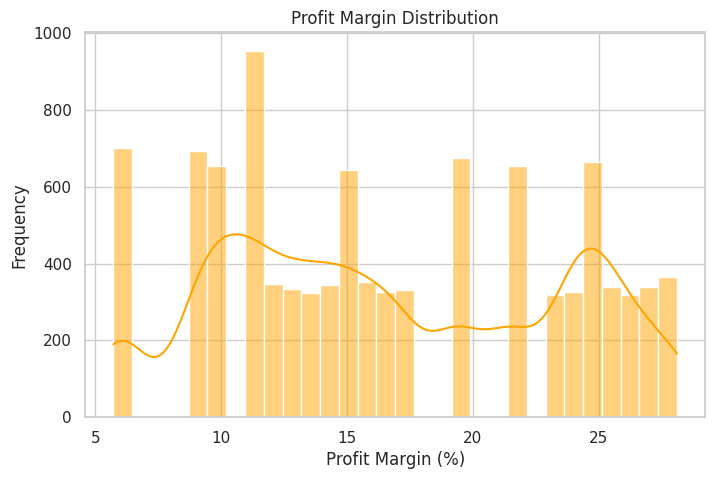

In [ ]:
# Step 4.2: Profit Margin Distribution
plt.figure(figsize=(8,5))
sns.histplot(master_df['profit_margin'].dropna(), bins=30, kde=True, color='orange')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(master_df.columns.tolist())

['sale_id', 'sale_date', 'region', 'product', 'customer_id', 'units_sold', 'revenue_x', 'customer_name', 'region_y', 'industry', 'revenue_contribution', 'revenue_y', 'cost', 'profit_margin']


/tmp/ipython-input-23-754227246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_rev.index, y=region_rev.values, palette='Set2')


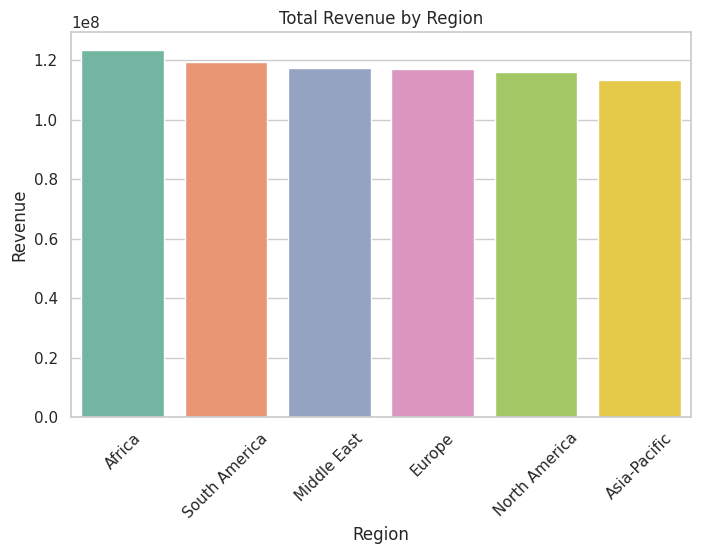

In [ ]:
# Step 4.3 Total Revenue by Region
region_rev = master_df.groupby('region')['revenue_x'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_rev.index, y=region_rev.values, palette='Set2')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


In [ ]:
master_df.rename(columns={'revenue_x': 'revenue'}, inplace=True)


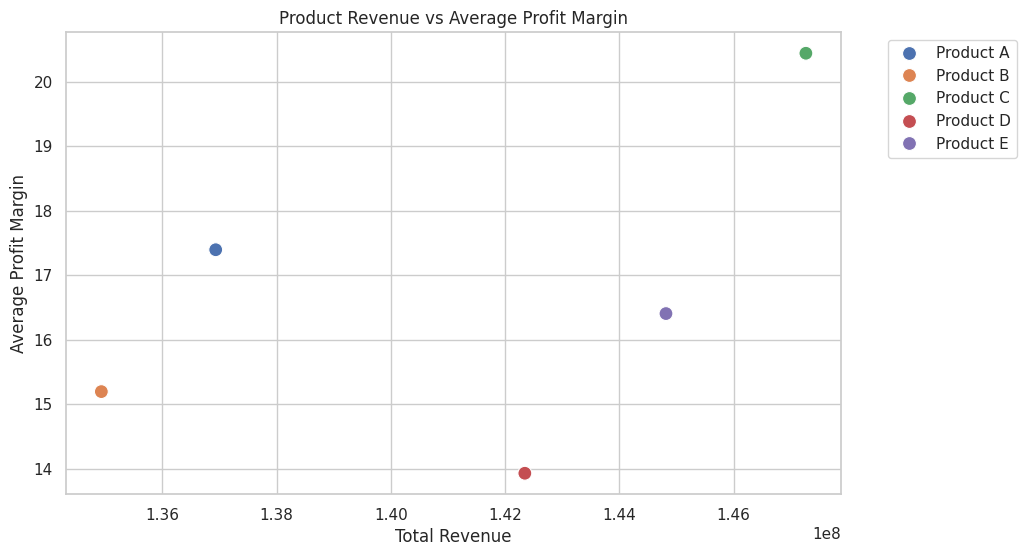

In [ ]:
# Step 4.4: Revenue vs Profit by Product
prod_perf = master_df.groupby('product').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='revenue', y='profit_margin', hue='product', data=prod_perf, s=100
)
plt.title('Product Revenue vs Average Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Step 5: Risk Flag Generation**



In [ ]:
# Step 5.1: Create risk_flag Column

def flag_risk(margin):
    if margin < 10:
        return '🔴 High Risk'
    elif 10 <= margin <= 20:
        return '🟡 Moderate Risk'
    else:
        return '🟢 Low Risk'

# Apply logic to master DataFrame
master_df['risk_flag'] = master_df['profit_margin'].apply(flag_risk)

# Preview
master_df[['product', 'region', 'revenue', 'profit_margin', 'risk_flag']].head(10)

,product,region,revenue,profit_margin,risk_flag
0,Product B,Middle East,30389.15,19.46,🟡 Moderate Risk
1,Product B,Africa,107899.47,8.72,🔴 High Risk
2,Product A,Asia-Pacific,116618.05,15.18,🟡 Moderate Risk
3,Product B,Middle East,160008.85,19.46,🟡 Moderate Risk
4,Product E,Africa,165294.95,6.26,🔴 High Risk
5,Product B,North America,36262.25,11.00,🟡 Moderate Risk
6,Product D,Asia-Pacific,74303.21,5.72,🔴 High Risk
7,Product E,South America,89798.60,26.03,🟢 Low Risk
8,Product D,South America,158690.56,11.11,🟡 Moderate Risk
9,Product C,Europe,11149.89,16.05,🟡 Moderate Risk


/tmp/ipython-input-28-2648451960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_flag', data=master_df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


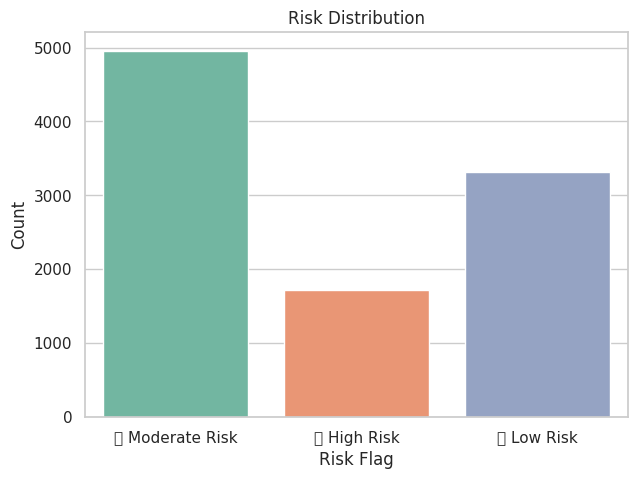

In [ ]:
# Step 5.2: Visualize Risk Distribution

plt.figure(figsize=(7,5))
sns.countplot(x='risk_flag', data=master_df, palette='Set2')
plt.title('Risk Distribution')
plt.xlabel('Risk Flag')
plt.ylabel('Count')
plt.show()


 **Step 6: Segment-Wise Deep Analysis**

/tmp/ipython-input-29-2800462509.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='industry', y='revenue', data=industry_perf, palette='viridis')


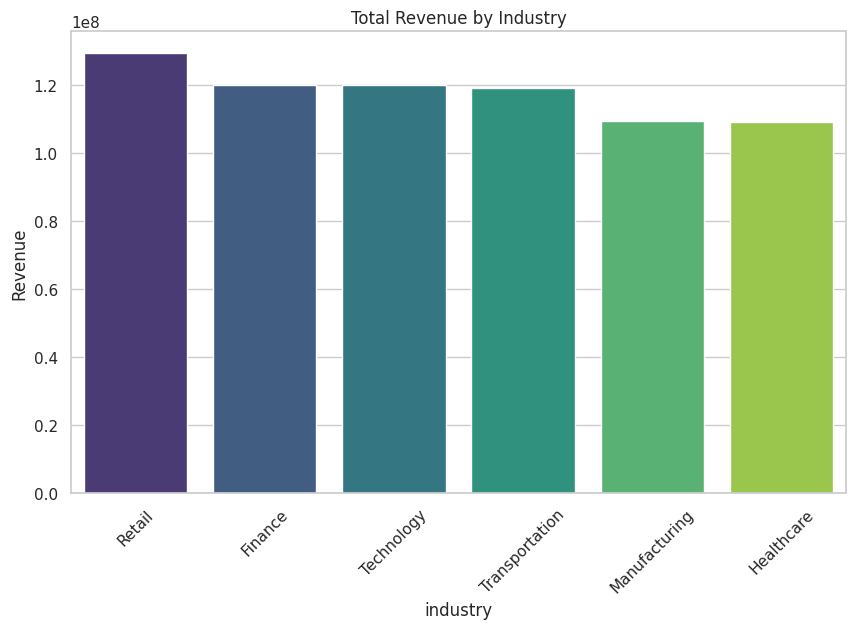

/tmp/ipython-input-29-2800462509.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='industry', y='profit_margin', data=industry_perf, palette='coolwarm')


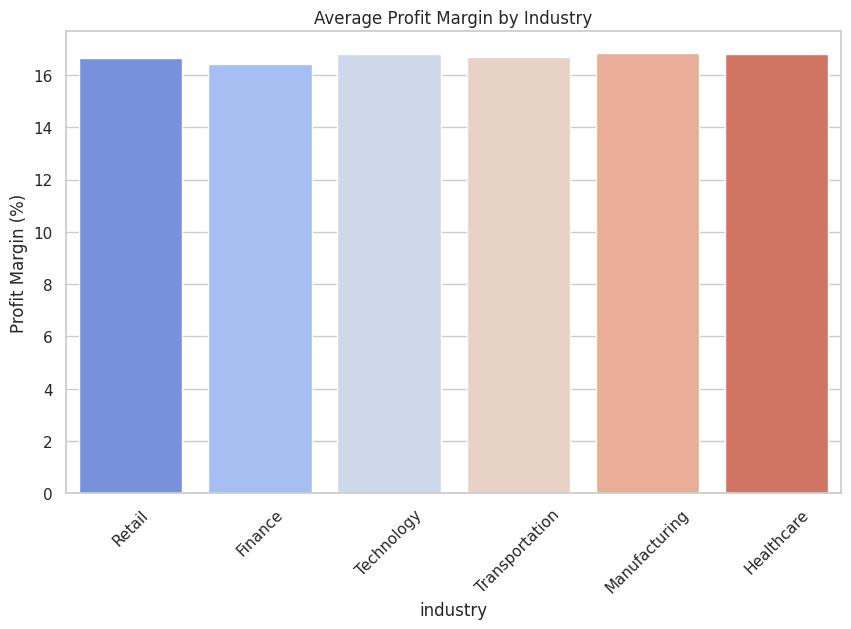

In [ ]:
# Step 6.1: Revenue & Average Margin by Industry

industry_perf = master_df.groupby('industry').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index().sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='industry', y='revenue', data=industry_perf, palette='viridis')
plt.title('Total Revenue by Industry')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x='industry', y='profit_margin', data=industry_perf, palette='coolwarm')
plt.title('Average Profit Margin by Industry')
plt.xticks(rotation=45)
plt.ylabel('Profit Margin (%)')
plt.show()

/tmp/ipython-input-30-1663224712.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='customer_name', data=customer_perf, palette='crest')


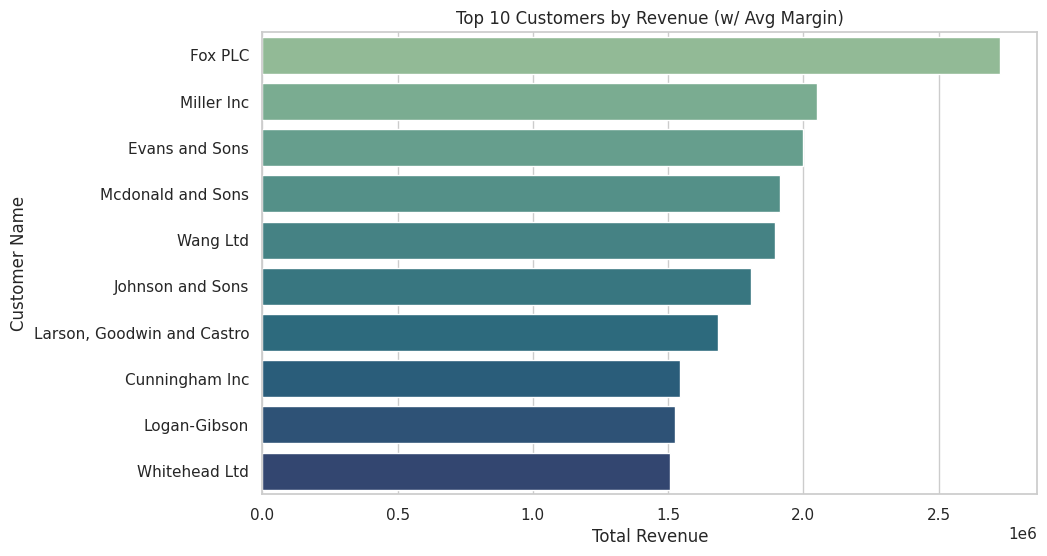

,customer_name,revenue,profit_margin
276,Fox PLC,2728751.65,15.884375
590,Miller Inc,2049921.77,20.462069
258,Evans and Sons,1998302.20,18.314545
572,Mcdonald and Sons,1912055.16,16.191429
905,Wang Ltd,1894027.44,17.539167
428,Johnson and Sons,1808168.85,17.408846
487,"Larson, Goodwin and Castro",1685151.50,16.227500
199,Cunningham Inc,1543467.71,15.200000
516,Logan-Gibson,1526401.84,18.482857
931,Whitehead Ltd,1507632.12,14.733158


In [ ]:
# Step 6.2: Top Customers by Revenue + Average Margin

customer_perf = master_df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index().sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='customer_name', data=customer_perf, palette='crest')
plt.title('Top 10 Customers by Revenue (w/ Avg Margin)')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Name')
plt.show()

# Display top customers with margin risk insight
customer_perf



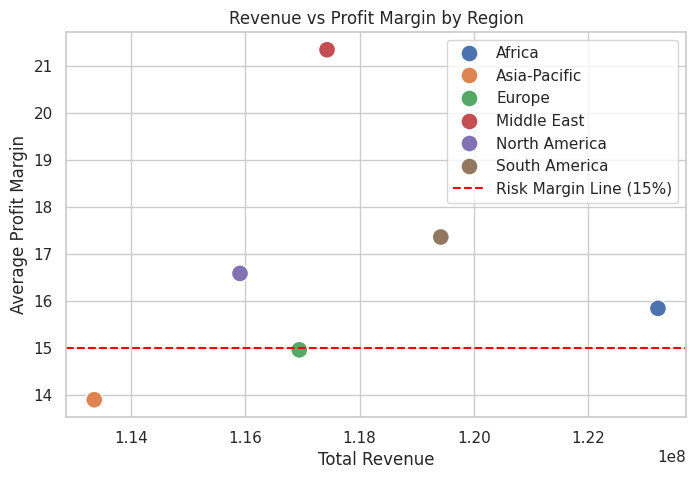

In [ ]:
# Step 6.3: Regional Comparison – Revenue vs Margin

region_perf = master_df.groupby('region').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(data=region_perf, x='revenue', y='profit_margin', hue='region', s=150)
plt.title('Revenue vs Profit Margin by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin')
plt.axhline(y=15, color='red', linestyle='--', label='Risk Margin Line (15%)')
plt.legend()
plt.show()

**Step 7: Ranking & Risk League Tables**

In [ ]:
#Step 7.1: Rank Products by Revenue within Region
product_region_perf = master_df.groupby(['region', 'product'])['revenue'].sum().reset_index()

# Rank products within each region by revenue
product_region_perf['revenue_rank'] = product_region_perf.groupby('region')['revenue'].rank(ascending=False)


product_region_perf.sort_values(['region', 'revenue_rank']).head(10)


,region,product,revenue,revenue_rank
1,Africa,Product B,25319638.13,1.0
4,Africa,Product E,24968953.15,2.0
3,Africa,Product D,24675449.96,3.0
2,Africa,Product C,24309841.69,4.0
0,Africa,Product A,23946007.84,5.0
6,Asia-Pacific,Product B,23954622.12,1.0
7,Asia-Pacific,Product C,23364399.95,2.0
9,Asia-Pacific,Product E,23247577.08,3.0
8,Asia-Pacific,Product D,21655979.23,4.0
5,Asia-Pacific,Product A,21138276.83,5.0


In [ ]:
# Step 7.2: Rank Customers by Profit Leakage Risk
customer_risk = master_df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Filter: Only customers with avg margin < 15%
leak_risk_customers = customer_risk[customer_risk['profit_margin'] < 15]

leak_risk_customers['risk_rank'] = leak_risk_customers['revenue'].rank(ascending=False)


leak_risk_customers.sort_values('risk_rank').head(10)



/tmp/ipython-input-33-3859241881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leak_risk_customers['risk_rank'] = leak_risk_customers['revenue'].rank(ascending=False)


,customer_name,revenue,profit_margin,risk_rank
931,Whitehead Ltd,1507632.12,14.733158,1.0
301,Gibbs Inc,1496825.10,14.284348,2.0
307,"Gilmore, Miller and Wright",1405875.79,13.988125,3.0
828,Smith-Smith,1393105.27,14.946000,4.0
343,Hammond LLC,1382133.89,13.828462,5.0
857,Taylor PLC,1340089.21,12.461250,6.0
843,Stokes LLC,1296446.38,13.018667,7.0
0,Acevedo and Sons,1274170.78,14.419286,8.0
91,"Brown, Norton and Hart",1231521.52,13.889444,9.0
678,Pearson-Smith,1229918.52,14.006667,10.0


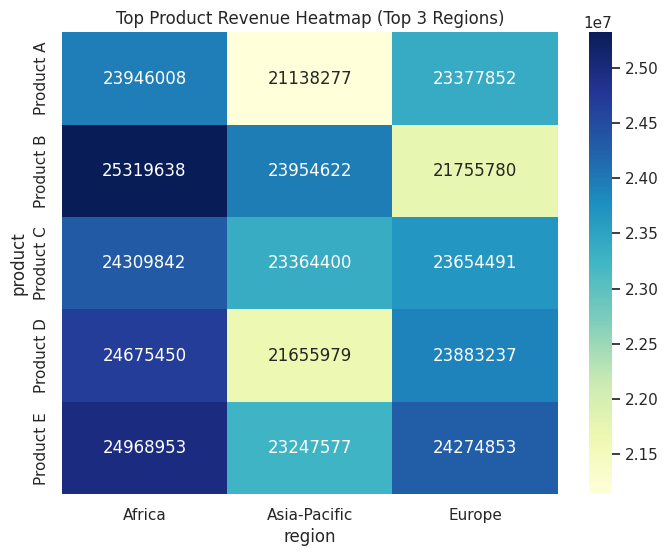

In [ ]:
# 7.3: Heatmap of Top 5 Products in Top 3 Regions
top_regions = product_region_perf['region'].value_counts().index[:3].tolist()
top_products = product_region_perf['product'].value_counts().index[:5].tolist()

heatmap_data = master_df[
    master_df['region'].isin(top_regions) & master_df['product'].isin(top_products)
]

pivot = heatmap_data.pivot_table(
    index='product',
    columns='region',
    values='revenue',
    aggfunc='sum'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Top Product Revenue Heatmap (Top 3 Regions)')
plt.show()


**Step 8: Business-Style Questions (Simulated Consulting Case Scenarios)**

In [ ]:
# Q1: "List all product-region pairs with revenue > ₹50,000 but margin < 20%"
leak_hotspots = master_df.groupby(['product', 'region']).agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

leak_hotspots = leak_hotspots[
    (leak_hotspots['revenue'] > 50000) &
    (leak_hotspots['profit_margin'] < 20)
].sort_values(by='revenue', ascending=False)

leak_hotspots.head(10)


,product,region,revenue,profit_margin
17,Product C,South America,25557982.86,9.34
6,Product B,Africa,25319638.13,8.72
24,Product E,Africa,24968953.15,6.26
18,Product D,Africa,24675449.96,17.38
5,Product A,South America,24511210.79,16.79
26,Product E,Europe,24274852.84,19.25
23,Product D,South America,24185206.75,11.11
28,Product E,North America,24171583.63,12.91
21,Product D,Middle East,24003136.53,12.38
7,Product B,Asia-Pacific,23954622.12,14.87


In [ ]:
# Q2: "Who are the top 5 customers associated with lowest average margin?
low_margin_customers = master_df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

low_margin_customers = low_margin_customers.sort_values(by='profit_margin').head(5)
low_margin_customers

,customer_name,revenue,profit_margin
482,"Lane, Mills and Short",345010.41,9.460000
429,"Johnson, Horton and Griffith",516506.20,10.241667
283,Fuentes-Wilkerson,358146.03,10.528333
203,Daniels Group,331877.19,10.802000
814,"Smith, Cardenas and Anderson",883701.63,10.932500


In [ ]:
#Q3: "Which industry earns high revenue but operates below average margin?"
# Overall avg margin
overall_avg_margin = master_df['profit_margin'].mean()

# Grouped by industry
industry_risk = master_df.groupby('industry').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Filter industries leaking margin
industry_risk = industry_risk[
    industry_risk['profit_margin'] < overall_avg_margin
].sort_values(by='revenue', ascending=False)

industry_risk


,industry,revenue,profit_margin
3,Retail,1.291599e+08,16.650457
0,Finance,1.199785e+08,16.419812
5,Transportation,1.190472e+08,16.667373


In [ ]:
# Q4: "Which regions are underperforming despite contributing > ₹100,000 in revenue?"
region_perf = master_df.groupby('region').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

underperforming_regions = region_perf[
    (region_perf['revenue'] > 100000) &
    (region_perf['profit_margin'] < 15)
]

underperforming_regions


,region,revenue,profit_margin
1,Asia-Pacific,1.133609e+08,13.905414
2,Europe,1.169462e+08,14.965572


In [ ]:
# Q5: "Which customers are over 2x average revenue contribution but under 15% profit?"
avg_contrib = master_df['revenue'].mean()

key_customers = master_df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

key_customers = key_customers[
    (key_customers['revenue'] > 2 * avg_contrib) &
    (key_customers['profit_margin'] < 15)
].sort_values(by='revenue', ascending=False)

key_customers.head(5)


,customer_name,revenue,profit_margin
931,Whitehead Ltd,1507632.12,14.733158
301,Gibbs Inc,1496825.10,14.284348
307,"Gilmore, Miller and Wright",1405875.79,13.988125
828,Smith-Smith,1393105.27,14.946000
343,Hammond LLC,1382133.89,13.828462
